In [5]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 60)
base_path = os.path.join(os.path.abspath(''), os.path.pardir)
if (not (base_path in sys.path)):
    sys.path.append(base_path)

In [6]:
#from tueplots import bundles
# global change:
#plt.rcParams.update(bundles.neurips2021(usetex=False))

(571, 25)


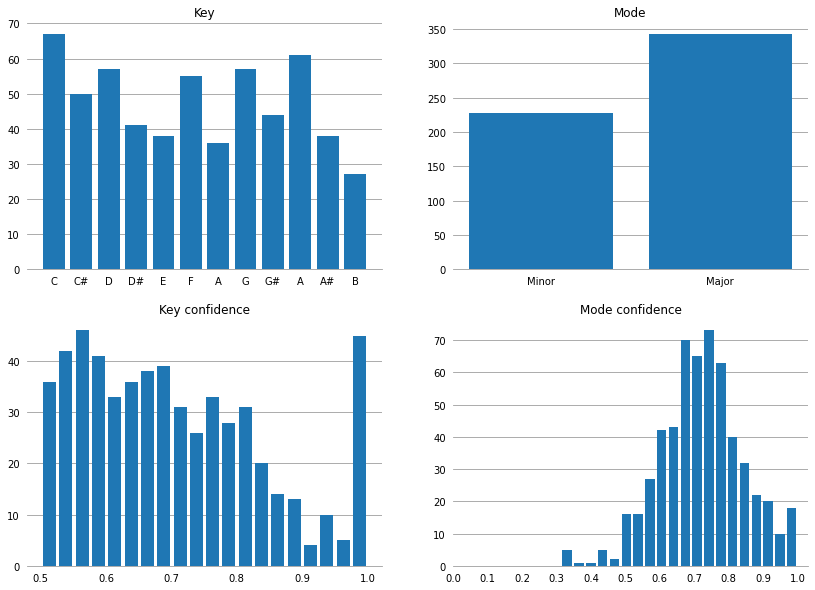

In [13]:
df = pd.read_pickle(base_path+'/data/piano/dataset.pkl')
df = df[df.key_confidence>0.5]
print(df.shape)
#df.sort_values(by='key_confidence').head(30)[['song_name', 'key', 'key_confidence', 'mode', 'URL', 'file_path']]
#plt.hist(df['key'])
#print(df['key'].value_counts().sort_index())
keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'A', 'G', 'G#', 'A', 'A#', 'B']
fig, axs = plt.subplots(2,2, figsize=(14,10))
axs[0,0].bar(range(12), df['key'].value_counts().sort_index(), align='center', width=0.8, tick_label=keys)
axs[0,0].set_title('Key')

axs[1,0].hist(df['key_confidence'], bins=20, rwidth=0.8)
axs[1,0].set_xticks(np.arange(0.5,1.05,0.1))
axs[1,0].set_title('Key confidence')

axs[0,1].bar(range(2), df['mode'].value_counts().sort_index(), align='center', width=0.8, tick_label=['Minor', 'Major'])
axs[0,1].set_title('Mode')

axs[1,1].hist(df['mode_confidence'], bins=20, rwidth=0.8)
axs[1,1].set_xticks(np.arange(0,1.1,0.1))
axs[1,1].set_title('Mode confidence')

for ax in axs.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#999999')

    # Second, remove the ticks as well.
    ax.tick_params(bottom=False, left=False)

    # Third, add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#999999')
    ax.xaxis.grid(False)
plt.savefig('../figures/piano_highconv_key_mode_stats.pdf')